### IMPORTING LIBRARIES

In [76]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
from warnings import filterwarnings
filterwarnings('ignore')

In [78]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")

In [79]:
deliveries_data = pd.read_csv('IPL_Ball_by_Ball_2008_2021.csv')
match_data = pd.read_csv('IPL_Matches_2008_2021.csv')
matches_df = pd.read_csv('matches.csv')
print("Data ready for exploration")

Data ready for exploration


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> Basic data exploration:</h1>


In [80]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,15-10-2021,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,13-10-2021,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,11-10-2021,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,10-10-2021,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,08-10-2021,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [81]:
deliveries_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [82]:
match_data.shape

(876, 20)

In [83]:
deliveries_data.shape

(208042, 17)

In [84]:
match_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             857
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [85]:
deliveries_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           197043
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           197803
kind                 197803
fielders_involved    200758
BattingTeam               0
dtype: int64

<a id="5">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 5) Number of tosses won by teams :</h1>

In [86]:
toss=match_data['TossWinner'].value_counts()
colors = ['turquoise',] * 16
colors[0] = 'crimson'
fig=px.bar( y=toss,x=toss.index,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="No. of tosses won by each team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

<a id="6">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 6) Decision made after winning the toss :</h1>

In [87]:
temp_series = match_data.TossDecision.value_counts()
labels = (np.array(temp_series.index))
values = (np.array((temp_series / temp_series.sum())*100))
colors = ['turquoise', 'crimson']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Toss decision percentage",
                  titlefont={'size': 30},
                  )
fig.show()

<a id="11">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 11) Total number of matches played by a team :</h1>


In [88]:
matches_played_byteams=pd.concat([match_data['Team1'],match_data['Team2']],axis=1)
teams=(matches_played_byteams['Team1'].value_counts()+matches_played_byteams['Team2'].value_counts()).reset_index()
teams.columns=['Team Name','Total Matches played']
teams.sort_values(by=['Total Matches played'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Team Name,Total Matches played
0,Mumbai Indians,217
1,Royal Challengers Bangalore,210
2,Kolkata Knight Riders,209
3,Chennai Super Kings,194
4,Kings XI Punjab,190
5,Rajasthan Royals,175
6,Delhi Daredevils,161
7,Sunrisers Hyderabad,138
8,Deccan Chargers,75
9,Delhi Capitals,49


In [89]:
wins=pd.DataFrame(match_data['WinningTeam'].value_counts()).reset_index()
wins.columns=['Team Name','Wins']
wins.style.background_gradient(cmap='PuBu')

,Team Name,Wins
0,Mumbai Indians,127
1,Chennai Super Kings,117
2,Kolkata Knight Riders,108
3,Royal Challengers Bangalore,100
4,Kings XI Punjab,88
5,Rajasthan Royals,86
6,Sunrisers Hyderabad,69
7,Delhi Daredevils,67
8,Delhi Capitals,29
9,Deccan Chargers,29


In [90]:
played=teams.merge(wins,left_on='Team Name',right_on='Team Name',how='inner')
played['% Win']=(played['Wins']/played['Total Matches played'])*100
played.sort_values(by=['% Win'],ascending=False).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu',subset=['% Win'])

,Team Name,Total Matches played,Wins,% Win
0,Rising Pune Supergiant,16,10,62.500000
1,Chennai Super Kings,194,117,60.309278
2,Delhi Capitals,49,29,59.183673
3,Mumbai Indians,217,127,58.525346
4,Kolkata Knight Riders,209,108,51.674641
5,Sunrisers Hyderabad,138,69,50.000000
6,Rajasthan Royals,175,86,49.142857
7,Royal Challengers Bangalore,210,100,47.619048
8,Kings XI Punjab,190,88,46.315789
9,Gujarat Lions,30,13,43.333333


In [91]:
colors = ['turquoise',] * 16
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Total Matches played'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

<a id="12">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; 

In [92]:
colors = ['turquoise',] * 16
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Wins'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total Win by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="13">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 13) Win % by teams :</h1>


In [93]:
colors = ['turquoise',] * 16
colors[-4] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['% Win'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win % by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="18">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">18) Scored 200+ runs :</h1>


In [94]:
high_scores=deliveries_data.groupby(['ID', 'innings','BattingTeam'])['total_run'].sum().reset_index() 
score_200=high_scores[high_scores['total_run']>=200]
score_200.head(5)

,ID,innings,BattingTeam,total_run
0,335982,1,Kolkata Knight Riders,222
2,335983,1,Chennai Super Kings,240
3,335983,2,Kings XI Punjab,207
14,335989,1,Chennai Super Kings,208
15,335989,2,Mumbai Indians,202


In [95]:
x1=score_200['BattingTeam'].value_counts()
x1=pd.DataFrame(x1)
x1.style.background_gradient(cmap='PuBu')

,BattingTeam
Royal Challengers Bangalore,20
Chennai Super Kings,19
Mumbai Indians,16
Kings XI Punjab,14
Kolkata Knight Riders,13
Sunrisers Hyderabad,12
Rajasthan Royals,11
Delhi Daredevils,5
Delhi Capitals,2
Deccan Chargers,1


In [96]:
colors = ['turquoise',] * 12
colors[0] = 'crimson'
fig=px.bar(x=x1.index,y=x1['BattingTeam'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total count of 200+ by batting team",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

<a id="34">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">34) Total runs scored by teams in first 6 overs :</h1>


In [97]:
team = deliveries_data['BattingTeam'].unique()
team_runs = []
for var in team:
    temp_df = deliveries_data[deliveries_data['BattingTeam']==var]
    temp_df = temp_df[temp_df['overs'].isin([0,1,2,3,4,5])]
    runs = temp_df['total_run'].sum()
    team_runs.append(runs)
team = pd.DataFrame(data=team_runs, index=team,columns=['Runs In First 6 Overs'])
#team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team.index.name = 'Team'

colors = ['turquoise',] * 16
colors[4] = 'crimson'
fig=px.bar(x=team.index,y=team['Runs In First 6 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier first 6 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="35">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">35) Total runs scored by teams in last 4 overs :</h1>



In [98]:
team1 = deliveries_data['BattingTeam'].unique()
team_runs1 = []
for var in team1:
    temp_df = deliveries_data[deliveries_data['BattingTeam']==var]
    temp_df = temp_df[temp_df['overs'].isin([19,18,17,16])]
    runs1 = temp_df['total_run'].sum()
    team_runs1.append(runs1)
team1 = pd.DataFrame(data=team_runs1, index=team1,columns=['Runs In Last 4 Overs'])
# team.sort_values('Runs In First 6 Overs', ascending=False, inplace=True)
team1.index.name = 'Team'
colors = ['turquoise',] * 16
colors[4] = 'crimson'
fig=px.bar(x=team1.index,y=team1['Runs In Last 4 Overs'],labels=dict(x="Team Name",y="Total runs"),)
fig.update_layout(title="Total runs scored by teams in thier last 4 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="36">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">36) Highest scoring run-rate in first 6 overs :</h1>



In [99]:
played1=played.merge(team,left_on='Team Name',right_on='Team',how='inner')
played3=played1.merge(team1,left_on='Team Name',right_on='Team',how='inner')
mintoover=np.dot(played3['Total Matches played'],6)
mintoover1=np.dot(played3['Total Matches played'],4)
played3['RR in first 6 overs']=(played3['Runs In First 6 Overs']/mintoover)
played3['RR in last 4 overs']=(played3['Runs In Last 4 Overs']/mintoover1)
played3

,Team Name,Total Matches played,Wins,% Win,Runs In First 6 Overs,Runs In Last 4 Overs,RR in first 6 overs,RR in last 4 overs
0,Chennai Super Kings,194,117,60.309278,8785,7354,7.547251,9.476804
1,Deccan Chargers,75,29,38.666667,3417,2539,7.593333,8.463333
2,Delhi Capitals,49,29,59.183673,2362,1688,8.034014,8.612245
3,Delhi Daredevils,161,67,41.614907,7360,5043,7.619048,7.830745
4,Gujarat Lions,30,13,43.333333,1559,921,8.661111,7.675000
5,Kings XI Punjab,190,88,46.315789,8954,6227,7.854386,8.193421
6,Kochi Tuskers Kerala,14,6,42.857143,680,337,8.095238,6.017857
7,Kolkata Knight Riders,209,108,51.674641,9701,6675,7.736045,7.984450
8,Mumbai Indians,217,127,58.525346,9923,7970,7.621352,9.182028
9,Pune Warriors,46,12,26.086957,1895,1360,6.865942,7.391304


In [100]:
colors = ['turquoise',] * 16
colors[4] = 'crimson'
fig=px.bar(x=played3['Team Name'],y=played3['RR in first 6 overs'],labels=dict(x="Team Name",y="Run Rate"),)
fig.update_layout(title="Run Rate in first 6 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="37">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">37) Highest scoring rate in last 4 overs :</h1>

In [101]:
colors = ['turquoise',] * 16
colors[0] = 'crimson'
fig=px.bar(x=played3['Team Name'],y=played3['RR in last 4 overs'],labels=dict(x="Team Name",y="Run Rate"),)
fig.update_layout(title="Run Rate in last 4 overs",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Percentage of runs for each team
</h1>

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Consistent batsman and bowler in each team
</h1>

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Number of times chasing team has won the match
</h1>

In [102]:
match_data['WonBy'].value_counts()

Wickets      472
Runs         386
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Teams that had won most number of matches
</h1>

In [103]:
colors = ['turquoise',] * 16
colors[8] = 'crimson'
fig=px.bar(x=played['Team Name'],y=played['Wins'],labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total Win by teams",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Teams that had lost most number of matches
</h1>

### SEASON-WISE ANALYSIS

<a id="1">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 1) Number of matches played in various seasons :</h1>

In [104]:
match_data['Season'] = pd.DatetimeIndex(match_data['Date']).year
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,15-10-2021,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,13-10-2021,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,11-10-2021,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,10-10-2021,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,08-10-2021,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [105]:
match_per_season=match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [106]:
colors = ['turquoise',] * 14
colors[5] = 'crimson'

fig=px.bar(data_frame=match_per_season,x=match_per_season.Season,y=match_per_season.matches,labels=dict(x="Season",y="Count"),)
fig.update_layout(title="Number of matches played in different seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

<a id="2">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 2) Total number of runs scored across seasons :</h1>


In [107]:
season_data=match_data[['ID','Season']].merge(deliveries_data, left_on = 'ID', right_on = 'ID', how = 'left').drop('ID', axis = 1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2021,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,2021,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,2021,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,2021,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,2021,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [108]:
season=season_data.groupby(['Season'])['total_run'].sum().reset_index()
p=season.set_index('Season')
fig = px.line(p, x=p.index, y="total_run")
fig.update_layout(title="Total Runs Across the Seasons ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.show()

<a id="3">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 3) Runs scored per match across seasons :</h1>


In [109]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_run']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season.style.background_gradient(cmap='PuBu',subset=['Runs scored per match'])

,matches,total_run,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


In [110]:
fig = px.line(runs_per_season, x=runs_per_season.index, y="Runs scored per match")
fig.update_layout(title="Runs scored per match across seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.show()


<a id="7">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 7) Toss decision across seasons :</h1>



In [111]:
fig=px.histogram(data_frame=match_data,x='Season',color='TossDecision',color_discrete_sequence=colors,barmode='group')
fig.update_layout(title="Toss decision in different seasons",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()

<a id="30">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">30) Total number of fours in each season :</h1>



In [112]:
data_4 = match_data['Season'].unique()

fours_list = []
for var in data_4:
    new_df = match_data[match_data['Season']==var]
    total_fours = 0
    for i in new_df['ID'].values:
        temp_df = deliveries_data[deliveries_data['ID']==i]
        fours = temp_df[temp_df['batsman_run']==4]['batsman_run'].count()
        total_fours+=fours
    fours_list.append(total_fours)
    

colors = ['turquoise',] * 14
colors[8] = 'crimson'
fig=px.bar(x=data_4, y=fours_list,labels=dict(x="Season",y="Total Fours"),)
fig.update_layout(title="Total number of Fours in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<a id="31">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">31) Total number of sixes in each season :</h1>


In [113]:

data_6 = match_data['Season'].unique()

# Getting total sixes from each season by check id from matches dataset in deliveries dataset.
sixes_list = []
for var in data_6:
    new_df = match_data[match_data['Season']==var]
    total_sixes = 0
    for i in new_df['ID'].values:
        temp_df = deliveries_data[deliveries_data['ID']==i]
        sixes = temp_df[temp_df['batsman_run']==6]['batsman_run'].count()
        total_sixes+=sixes
    sixes_list.append(total_sixes)
    
colors = ['turquoise',] * 14
colors[3] = 'crimson'
fig=px.bar(x=data_4, y=sixes_list,labels=dict(x="Season",y="Total Sixes"),)
fig.update_layout(title="Total number of Sixes in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()



<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">32) Total runs scored from boundaries in each season :</h1>


In [114]:
runs4=np.dot(fours_list,4)
runs6=np.dot(sixes_list,6)

In [115]:
k=runs4+runs6
Y=match_data['Season'].unique()
colors = ['turquoise',] * 14
colors[8] = 'crimson'
fig=px.bar(x=Y,y=k,labels=dict(x="Season",y="Total runs"),)
fig.update_layout(title="Total number of runs scored from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()



<a id="33">
<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">33) Total contribution of runs from boundaries in each season :</h1>


In [116]:
totruns=np.array(season['total_run'])
res=(k/totruns)*100

In [117]:
colors = ['turquoise',] * 14
colors[1] = 'crimson'
fig=px.bar(x=Y,y=res,labels=dict(x="Season",y="Percentage"),)
fig.update_layout(title="Total contribution of runs from boundaries in each season",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">
Seasons which had most number of matches:
</h1>

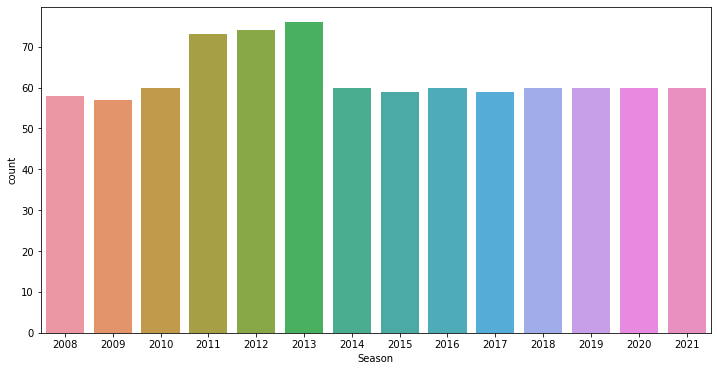

In [118]:
#Season Which had most number of matches
plt.figure(figsize=(12,6))
sns.countplot(x='Season', data=match_data)
plt.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">
Champions in each match:
</h1>

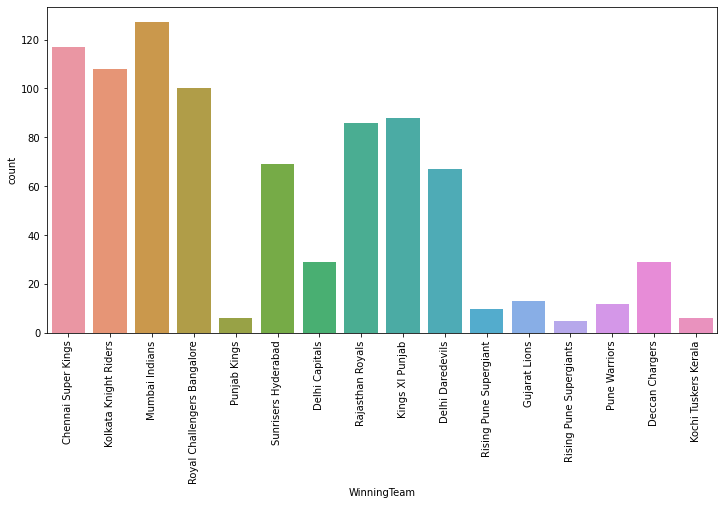

In [119]:
#Number of wins per team:
plt.figure(figsize=(12,6))
sns.countplot(x='WinningTeam', data=match_data)
plt.xticks(rotation=90)
plt.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">
Most winning team in each season:
</h1>

In [120]:
temp_df = match_data.drop_duplicates(subset=['Season'], keep='last')[['Season', 'WinningTeam']].reset_index(drop=True)
temp_df

,Season,WinningTeam
0,2021,Royal Challengers Bangalore
1,2020,Chennai Super Kings
2,2019,Chennai Super Kings
3,2018,Chennai Super Kings
4,2017,Sunrisers Hyderabad
5,2016,Rising Pune Supergiants
6,2015,Kolkata Knight Riders
7,2014,Kolkata Knight Riders
8,2013,Kolkata Knight Riders
9,2012,Mumbai Indians


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">
Most valuable player in each season:
</h1>

NameError: name 'autolabel' is not defined

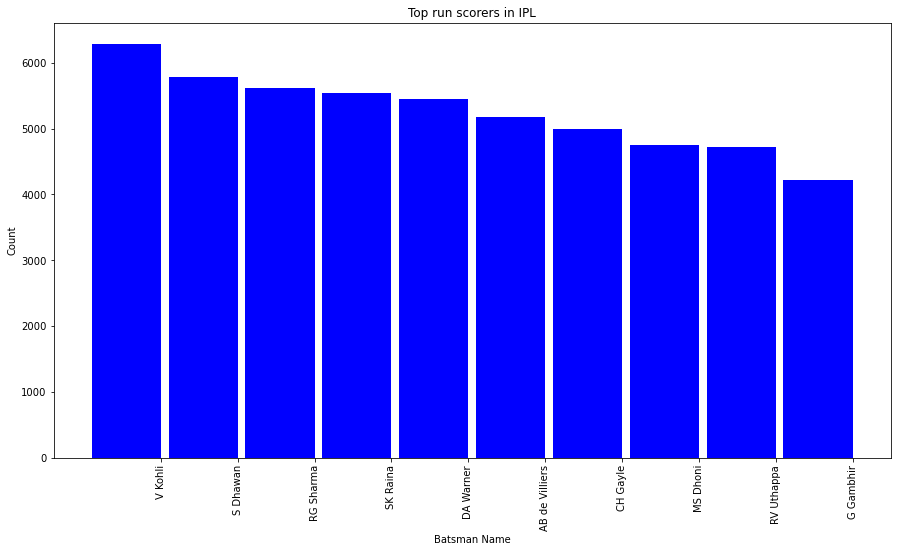

In [121]:
## Batsman analysis: # batsman with more number of IPL runs
#Top runsccores in IPL
temp_df = deliveries_data.groupby('batter')['batsman_run'].agg('sum').reset_index().sort_values(by='batsman_run', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batter'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_run']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsman Name')
autolabel(rects)
plt.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;">
Biggest victories in IPL while defending a total and while chasing a total:
</h1>

### PLAYER-WISE ANALYSIS


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Leading run scorers of all time:
</h1>


NameError: name 'autolabel' is not defined

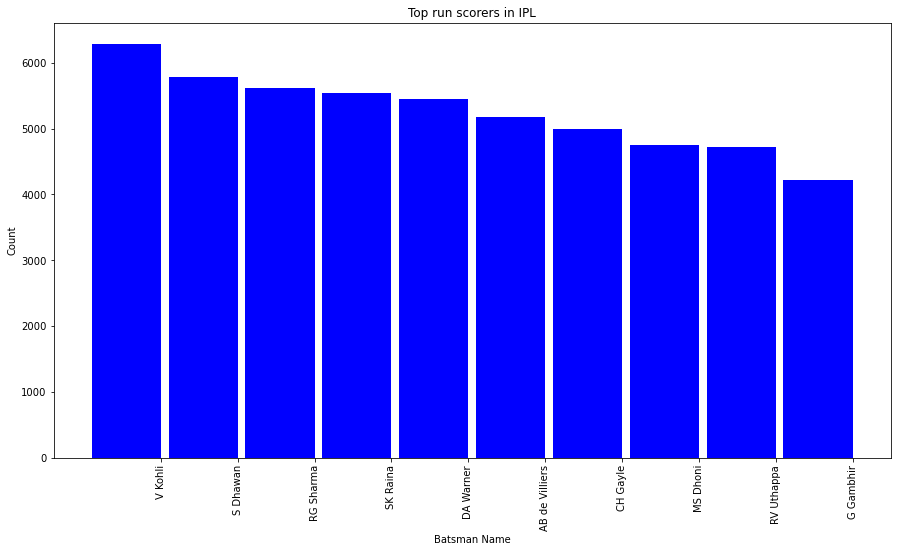

In [122]:
temp_df = deliveries_data.groupby('batter')['batsman_run'].agg('sum').reset_index().sort_values(by='batsman_run', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batter'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_run']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsman Name')
autolabel(rects)
plt.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Batsman who have payed the most number of balls:
</h1>

In [123]:
balls_played=deliveries_data.groupby(['batter'])['ballnumber'].count().reset_index()
balls_played.sort_values(by='ballnumber',ascending=False).head(10).style.background_gradient(cmap='PuBu')


,batter,ballnumber
527,V Kohli,4960
426,S Dhawan,4688
396,RG Sharma,4398
457,SK Raina,4177
120,DA Warner,4012
417,RV Uthappa,3746
316,MS Dhoni,3604
160,G Gambhir,3524
100,CH Gayle,3516
24,AB de Villiers,3487


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Top 10 run scorer of all time
</h1>

In [124]:
runs=deliveries_data.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,V Kohli,6293
1,S Dhawan,5784
2,RG Sharma,5613
3,SK Raina,5536
4,DA Warner,5451
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4746
8,RV Uthappa,4724
9,G Gambhir,4217


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Player who had hit the most number of 4's
</h1>

In [125]:
balls_played=balls_played.merge(runs,left_on='batter',right_on='Batsman',how='outer')
four=deliveries_data[deliveries_data['batsman_run']==4]
runs_4=four.groupby('batter')['batsman_run'].count().reset_index()
runs_4.columns=['Batsman','4s']
runs_4.sort_values(by='4s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,4s
0,S Dhawan,654
1,V Kohli,549
2,DA Warner,525
3,SK Raina,506
4,G Gambhir,492
5,RG Sharma,491
6,RV Uthappa,462
7,AM Rahane,417
8,AB de Villiers,414
9,CH Gayle,408


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Player who had hit the most number of 6's
</h1>

In [126]:
six=deliveries_data.groupby('batter')['batsman_run'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['Batsman','6s']
six.sort_values(by='6s',ascending=False).head(10).reset_index().drop('index',axis=1).style.background_gradient(cmap='PuBu')

,Batsman,6s
0,CH Gayle,359
1,AB de Villiers,253
2,RG Sharma,228
3,MS Dhoni,219
4,KA Pollard,215
5,V Kohli,211
6,SK Raina,204
7,DA Warner,201
8,SR Watson,190
9,RV Uthappa,168


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Player with highest strike rate
</h1>

In [127]:
player=pd.concat([runs,balls_played.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player['strike_rate']=player['runs']/player['ballnumber']*100
player['4s'].fillna(0,inplace=True)
player.isnull().values.any()

False

In [128]:
player.sort_values(by='strike_rate',ascending=False).head(10)

,Batsman,runs,ballnumber,4s,6s,strike_rate
75,B Stanlake,5,2,19.0,0,250.000000
526,Umar Gul,39,19,0.0,5,205.263158
413,RS Sodhi,4,2,14.0,0,200.000000
489,Shahid Afridi,81,46,0.0,6,176.086957
520,TU Deshpande,21,12,0.0,1,175.000000
183,I Malhotra,7,4,11.0,0,175.000000
33,AD Russell,1704,1012,12.0,143,168.379447
265,LJ Wright,106,63,5.0,3,168.253968
492,Shivam Sharma,5,3,0.0,0,166.666667
246,KMDN Kulasekara,5,3,309.0,0,166.666667


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Player who had taken leading number of wickets
</h1>

In [129]:
deliveries_data['kind'].unique()
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']
hwt=deliveries_data[deliveries_data["kind"].isin(dismissal_kinds)]
bo=hwt['bowler'].value_counts()

In [130]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=bo[:10].index,y=bo[:10],labels=dict(x="Bowler",y="Total Wickets"),)
fig.update_layout(title="Leading wicket-takers",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Players who won the most MOM awards
</h1>

In [131]:
colors = ['turquoise',] * 11
colors[0] = 'crimson'
fig=px.bar(x=match_data.Player_of_Match.value_counts()[:10].index,y=match_data.Player_of_Match.value_counts()[:10],labels=dict(x="Players",y="Count"),)
fig.update_layout(title="Top 10 MOM awardee",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Player with most number of IPL runs
</h1>

In [132]:
runs=deliveries_data.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns=['Batsman','runs']
y=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
y.style.background_gradient(cmap='PuBu')

,Batsman,runs
0,V Kohli,6293
1,S Dhawan,5784
2,RG Sharma,5613
3,SK Raina,5536
4,DA Warner,5451
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4746
8,RV Uthappa,4724
9,G Gambhir,4217


<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Players who had bowled more number of balls in IPL
</h1>

NameError: name 'autolabel' is not defined

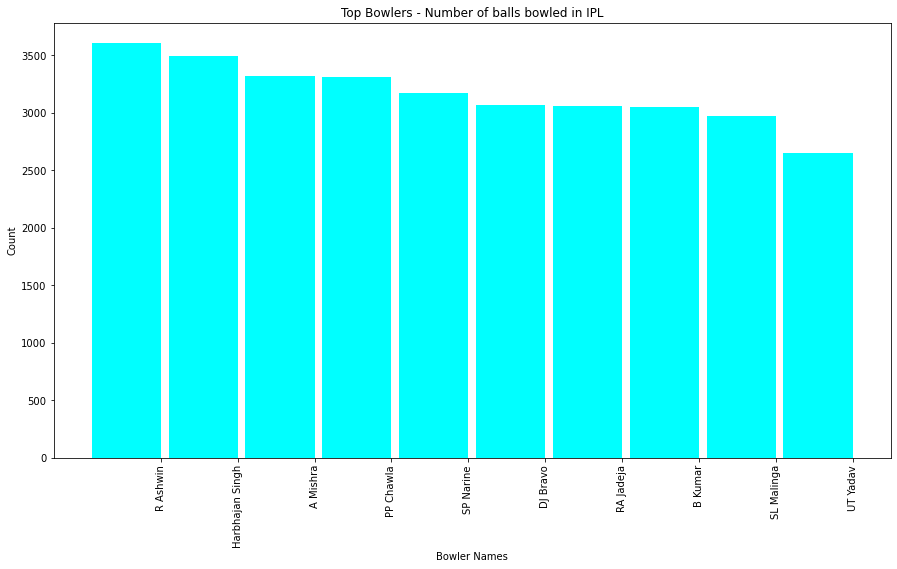

In [133]:
#the bowlers who has bowled most number of balls in IPL.
temp_df = deliveries_data.groupby('bowler')['ballnumber'].agg('count').reset_index().sort_values(by='ballnumber', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ballnumber']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

<h1 style = "font-family: Snell Roundhand;font-weight: 500;font-size: 30px; font-style: normal; background-color: #000000; color :white;"> 
Players who had bowled more number of extras
</h1>

NameError: name 'autolabel' is not defined

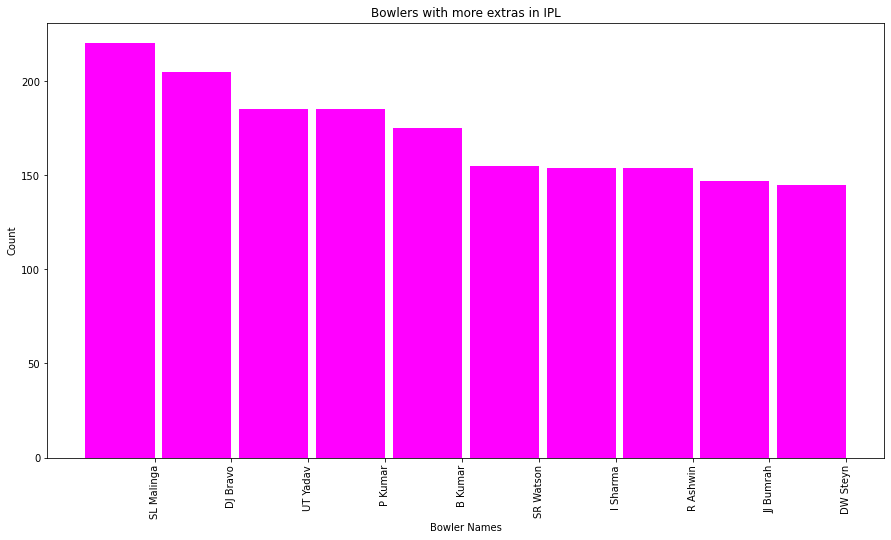

In [134]:
# the bowlers who has bowled more number of extras in IPL.
temp_df = deliveries_data.groupby('bowler')['extras_run'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extras_run', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extras_run']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()